In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#import FreqRespPy

from FreqRespPy.data_search import get_target_file_list, open_target_file
#from FreqRespPy.target_calc import mean_freq_response

In [2]:
def mean_freq_response(target_df):
    target_df = target_df.apply(pd.to_numeric)
    target_df_lin = 10**(target_df/10)
    row_means = target_df_lin.mean(axis=1)
    return row_means

In [3]:
data_directory = 'C:/Users/kevinb/Documents/GitHub/FreqResp/data/'
data_files = get_target_file_list(data_directory)
#print(data_files)

In [4]:
mean_response_output = []

In [5]:
 for file in data_files:

        meta, df = open_target_file(data_directory, file)

#        print(df)
#        print(df.dtypes)

        mean_response = mean_freq_response(df)
        mean_response_output.append(mean_response)

 df_output = pd.concat(mean_response_output, axis=1)
 df_output.to_csv('output/test.csv')

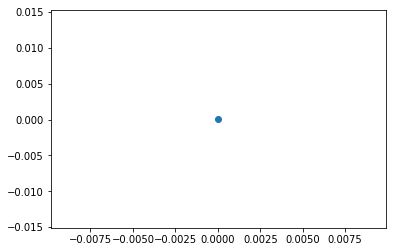

In [25]:
plt.scatter(mean_response[1], mean_response[2])

In [20]:
#print(df)